In [2]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import csv

Objectifs :
- analyse de différents livres à travers la collecte des tweets
- faire des visualisations (a minima, nuages de mots et fréquence des bigrammes & trigrammes)

###### L'art de la guerre

In [3]:
df = pd.read_csv('the_art_of_war.csv', delimiter = '\t')
df

,",tweets;;;;;"
0,"0,""If you know the enemy &amp; know yourself, ..."
1,;;;;;
2,"-The Art of War"";;;;;"
3,"1,""Today's Italian American MLB player is Art ..."
4,"2,""@Cernovich @rramom59 You are such a drama q..."
...,...
2617,"997,""Know yourself and you will win all battle..."
2618,;;;;;
2619,"—Sun Tzu, The Art of War"";;;;;"
2620,"998,@Peterman43 The art of war;;;;;"


In [4]:
df.columns = ['tweets']
df

,tweets
0,"0,""If you know the enemy &amp; know yourself, ..."
1,;;;;;
2,"-The Art of War"";;;;;"
3,"1,""Today's Italian American MLB player is Art ..."
4,"2,""@Cernovich @rramom59 You are such a drama q..."
...,...
2617,"997,""Know yourself and you will win all battle..."
2618,;;;;;
2619,"—Sun Tzu, The Art of War"";;;;;"
2620,"998,@Peterman43 The art of war;;;;;"


In [8]:
text = " ".join(i for i in df['tweets'])

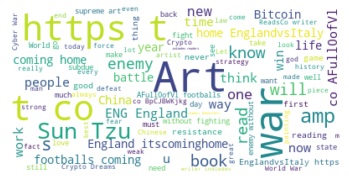

In [6]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

À travers ce premier nuage de mots, on se rend compte que quelque données parasites viennent un peu fausser cette visualisation. En effet, certains termes ne sont pas pertinents pour le nuage de mots et pour le but de faire ce type de visualisation (en plus de ne pas être exploitable au niveau analytique). Il y a donc besoin de faire un nettoyage.

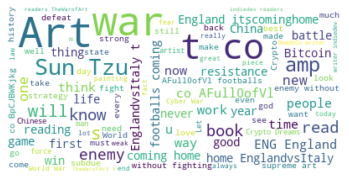

In [7]:
text = text.replace("https", "")
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Afin d'optimiser le nettoyage, je vais créer un dictionnaire de mots à exclure, ce qui me servira à avoir un nuage de mots pertinents et vraiment représentatifs du sujet en question

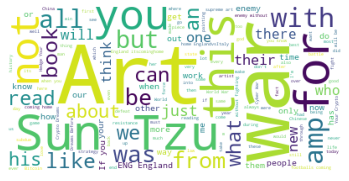

In [25]:
exclure_mots = [
    "t", "to be", "co", "u", "s", 
    "AFull0ofVl", "i", "a", "https", "hi", "the", 
    "is", "on", "and", "it", "in", "of",
    "my", "by", "as", "to", "they", "so",
    "that", "he", "no", "have", "at", "are"
]

wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 150).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Sans grande suprise, les morts qui reviennent le plus sont les mots clés présents dans le titre du livre analysé, ainsi que le nom de l'auteur. On peut également noter des mots en rapport avec la thématique du livre ou ce qu'il peut inspirer.

Pour l'analyse de la fréquence, j'ai d'abord voulu faire un test sur la fréquence des lettres

In [30]:
def freq(text_analyse):
    count_letter , compteur = {} , 0
    for character in text_analyse:
        if character.lower() not in count_letter:
            count_letter[character.lower()] = 1
            compteur += 1
        else:
            count_letter[character.lower()] += 1
            compteur += 1
            
    return count_letter, compteur

count_letter, compteur = freq(text)

L = sorted(count_letter.items(), key = lambda colonne: colonne[1] , reverse = True)
for i in L:
    print('{} : {}'.format(i[0],i[1]/compteur))

  : 0.15166325082768406
e : 0.07243967341712888
t : 0.07081535837644934
; : 0.06263167700973156
a : 0.05906296131741504
o : 0.0530625504612577
i : 0.046331197836794555
r : 0.04587256770766151
n : 0.04281025611626274
s : 0.04268604378962254
h : 0.03443547886240619
l : 0.026963629675280314
d : 0.02186136948867518
c : 0.02180404072253355
u : 0.020805564712233483
m : 0.01822099283868163
f : 0.017676369560336136
w : 0.017126968884812178
p : 0.015794075072019263
y : 0.014795599061719194
g : 0.01456628399715267
" : 0.01215847581920418
b : 0.011771506647748174
. : 0.01136542788757829
, : 0.009779332024326506
/ : 0.008618424509958485
k : 0.007940034110615854
v : 0.007863595755760346
# : 0.005121369775319011
@ : 0.004113338970662004
: : 0.0036069348697442658
1 : 0.003076643782934182
2 : 0.0029237670732231665
z : 0.0027613355691552127
0 : 0.002737448583262867
4 : 0.0023982533835915517
9 : 0.002364811603342267
3 : 0.0022501540710590058
j : 0.0022501540710590058
5 : 0.0021832705105604366
x : 0.0021

Comme les données sont des tweets, on retrouve une plus grande fréquence d'émoji et de caractères spéciaux, qui sont une norme d'utilisation sur ce type d'écrits.

Maintenant, voyons pour la fréquence bigramme et trigramme. S'agissant de données en langue anglaise, je me réfère aux 20 bigrammes et 20 trigrammes les plus fréquents de cette langue.

In [ ]:
bi = ["th", "he", "in", "er", "an", "re"]